In [ ]:
### Function to get Maze layout with user input:

In [1]:
# Import libraries:
import numpy as np
import time
from A_star_Dijkstra_utilities import *
import importlib
from matplotlib import pyplot as plt
%matplotlib inline


import params

importlib.reload(params)

# Generate grid and return X and Y co-ordinates of all the nodes:
[params.X,params.Y] = generate_grid()




In [2]:
### 1. Run A* algorithm - Without graph!

# Setup the algorithm:

numNodes = len(params.X)


# Define the start and goal nodes:
startIdx = get_node_idx(0,0)
goalIdx =  get_node_idx(8.0,0.5)
epsilon = 50  # Weighting factor for the Heuristic:

start = time.time()
# Run the A* algorithm:
aStarPathIndices = astar_no_graph(startIdx,goalIdx, numNodes, epsilon)  

end = time.time()


timeAstar = end - start

print (" Time taken for A* without the Graph is : " , timeAstar ,  "secs")

 Time taken for A* without the Graph is :  0.8497369289398193 secs


 Time taken for A* without the Graph is :  0.8497369289398193 secs


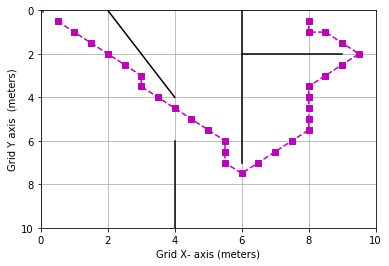

In [3]:
### 2. Plot path generated by A* algorithm: 

# 1. The grid: 
# 2. The maze segments (Black solid lines)
# 3. The start (Red) and Goal (Green) nodes:
# 3. The shortest path (Purple line with markers)



# Start by plotting the maze segments: 
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'-k')
    

# Plot the start and Goal nodes:
plt.plot(params.X[startIdx], params.Y[startIdx], 'r*')
plt.plot(params.X[goalIdx], params.Y[goalIdx], 'g*')

# Plot the shortest path:
plt.plot(params.X[aStarPathIndices], params.Y[aStarPathIndices], 'm--s')


# Set xLimit and yLimit: 
plt.xlim(0, params.widthX )
plt.ylim(0, params.widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')


timeAstar = end - start

print (" Time taken for A* without the Graph is : " , timeAstar ,  "secs")

# print(aStarPathIndices)

In [8]:
### 3. Run Vectorized RRT planning algorithm: Many Thanks to Bijo Sebastian for providing this awesome implementation!

from RRT_vect_utilities import *


# 1. Give the inputs to the RRT algorithm:
start = Node(0.0, 0.0) # Start
goal = Node(8.0, 0.5) # Goal

# 2. Inflate the maze segments:
inflate_segments()

# 3. Setup for vectorization:
setup_vec()

# 4. Run the RRT algorithm and directly plot the path: 
startTime = time.time()
RRT_path = RRT(start, goal)
endTime = time.time()


# 5. Get the true path from start to goal: 
revPath = reverse_path(RRT_path)

timeRRT= endTime - startTime

print (" Time taken for RRT Planner is : " , timeRRT ,  "secs")
print (" The RRT path is : ")
print (revPath)


 Time taken for RRT Planner is :  0.013147354125976562 secs
 The RRT path is : 
[(0.0, 0.0), (3.8583682035319966, 5.840633082635243), (4.6487870244411456, 4.920576070291904), (6.122589715690666, 9.559143490059624), (9.150495243910253, 5.692607134037316), (9.269615627279041, 1.6365267743512224), (8.0, 0.5)]


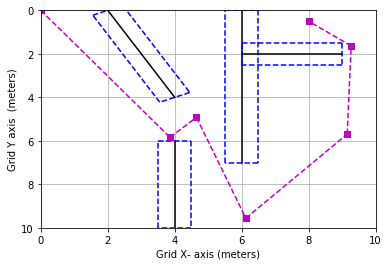

In [10]:
### 4. Plot path generated by RRT algorithm: 

# 1. First plot the maze segments and inflated maze segments:
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'-k')

plt.xlim(0, params.widthX )
plt.ylim(0, params.widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')  

for mazeSeg in params.infMazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'--b')
    

# 2. Next plot the start and goal nodes: 
plt.plot(start.x, start.y, 'r*')
plt.plot(goal.x , goal.y , 'g*')

# 3. Now plot the path: 
currNode = revPath[0]

for i in range(1,len(revPath)): 
    
    nextNode = revPath[i]
    
    plt.plot([currNode[0] , nextNode[0]] , [currNode[1] , nextNode[1]], 'm--s')
   
    currNode = nextNode
    


 The RRT path is: 
[ 8.0 0.5 ] -->[ 9.814275399883615 1.5853546802015062 ] -->[ 9.782473754376484 3.303484033002042 ] -->[ 5.592400971351488 9.030211183581061 ] -->[ 2.8849021359426303 1.9490936709939355 ] -->[ 2.553485376572526 1.5747102691067547 ] -->0.0 0.0


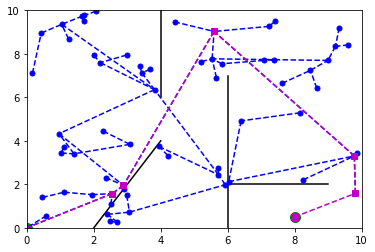

 Time taken for Regular RRT Planner with plotting is :  0.6262562274932861 secs


In [2]:
### 5. Run regular RRT planning algorithm: Many Thanks to Bijo Sebastian for providing this awesome implementation!

from RRT_utilities import *


# 1. Give the inputs to the RRT algorithm:
start = Node(0.0, 0.0) # Start
goal = Node(8.0, 0.5) # Goal

# # 2. Inflate the maze segments:
# inflate_segments()

# # 3. Setup for vectorization:
# setup_vec()

# 4. Run the RRT algorithm and directly plot the path: 
startTime = time.time()
RRT_path = RRT(start, goal)
endTime = time.time()


# # 5. Get the true path from start to goal: 
# revPath = reverse_path(RRT_path)

timeRRT= endTime - startTime

print (" Time taken for Regular RRT Planner with plotting is : " , timeRRT ,  "secs")
# print (" The RRT path is : ")
# print (revPath)

In [2]:
### 6. Run RRT* with the Vectorized collision checking: 

from RRT_star_vect_utilities import *


# 1. Give the inputs to the RRT* algorithm:
start = Node(0.0, 0.0) # Start
goal = Node(8.0, 0.5) # Goal

# 2. Inflate the maze segments:
inflate_segments()

# 3. Setup for vectorization:
setup_vec()

# 4. Run the RRT* algorithm:
startTime = time.time()
RRT_star_path = RRT_star(start, goal)
endTime = time.time()


# 5. Get the true path from start to goal: 
revPath = reverse_path(RRT_star_path)

timeRRT= endTime - startTime

print (" Time taken for RRT* Planner is : " , timeRRT ,  "secs")
print (" The RRT* path is : ")
print (revPath)


 Time taken for RRT* Planner is :  0.028784990310668945 secs
 The RRT* path is : 
[(0.0, 0.0), (6.000372543050015, 7.69720230477259), (7.935628839368479, 5.118664663893889), (9.335463766159654, 1.7999818887580854), (8.216970877459882, 0.5844265431268747), (8.0, 0.5)]


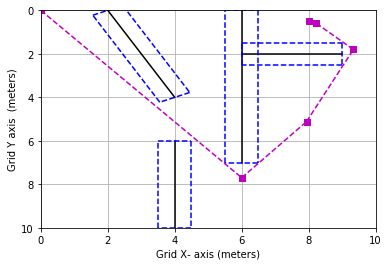

In [3]:
### 7. Plot path generated by RRT* algorithm: 

# 1. First plot the maze segments and inflated maze segments:
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'-k')

plt.xlim(0, params.widthX )
plt.ylim(0, params.widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')  

for mazeSeg in params.infMazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'--b')
    

# 2. Next plot the start and goal nodes: 
plt.plot(start.x, start.y, 'r*')
plt.plot(goal.x , goal.y , 'g*')

# 3. Now plot the path: 
currNode = revPath[0]

for i in range(1,len(revPath)): 
    
    nextNode = revPath[i]
    
    plt.plot([currNode[0] , nextNode[0]] , [currNode[1] , nextNode[1]], 'm--s')
   
    currNode = nextNode